<a href="https://colab.research.google.com/github/EverHernandez01/Senales_y-_Sistemas_2025_S2/blob/main/Parcial_1/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

<p><b>PARCIAL #1 SEÑALES Y SISTEMAS - 2025 2S</p>

<p><b>Estudiante:</b> Ever Daniel Hernández Tulcán</p>



</div>

In [28]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from ipywidgets import interact

### Ejercicio 1

La distancia media entre dos señales periódicas:

$$
x_1(t) \in \mathbb{R}, \mathbb{C} \quad \text{y} \quad x_2(t) \in \mathbb{R}, \mathbb{C}
$$

se puede expresar a partir de la potencia media de la diferencia entre ellas:

$$
d^2(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Sea \(x_1(t)\) y \(x_2(t)\) dos señales definidas como:

$$
x_1(t) = A e^{-j n \omega_0 t}
$$

$$
x_2(t) = B e^{j m \omega_0 t}
$$

con:

$$
\omega_0 = \frac{2\pi}{T}; \quad T, A, B \in \mathbb{R}^+, \quad n, m \in \mathbb{Z}.
$$

**Determine la distancia entre las dos señales.**  
**Compruebe sus resultados con Python.**



In [29]:
# definnimos las variables en t definiendo que es real
t = sp.symbols ('t', real=True) # para todo t

# Variables dadas por el enunciado
# Variables reales Positiva
A, B = sp.symbols('A B', real= True , Positive= True ) # A y B son las amplitudes de las señales
n, m = sp.symbols('n m', integer = True) # Multipos enteros que multiplican a la frecuancia
T = sp.symbols ('T', rel= True , Positive= True) # definimos el Periodo
Wo = 2* sp.pi / T  # Frecuancia angular


# Señales definidas
x1 = A * sp.exp(-sp.I * n * Wo * t) # primera ecuancion de X(1)
x2 = B * sp.exp(-sp.I * m * Wo * t) # primera ecuancion de X(2)

# furmula de la definicion de la variable entre las dos señales
d = sp.sqrt(sp.limit( (1 / T) * sp.integrate( sp.Abs(x1 - x2)**2, (t, 0, T) ), T, sp.oo ))
d

sqrt(A**2 - 2*A*B + B**2)

## **2.**
Encuentre la señal en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de \( 5\,kHz \) y 4 bits de capacidad de representación, aplicado a la señal continua:

\
x(t) = 3\cos(1000πt) + 5\sin(3000πt) + 10\cos(11000πt)

Realizar la simulación del proceso de discretización (incluyendo al menos tres períodos de \( x(t) \)).  
En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

</center>


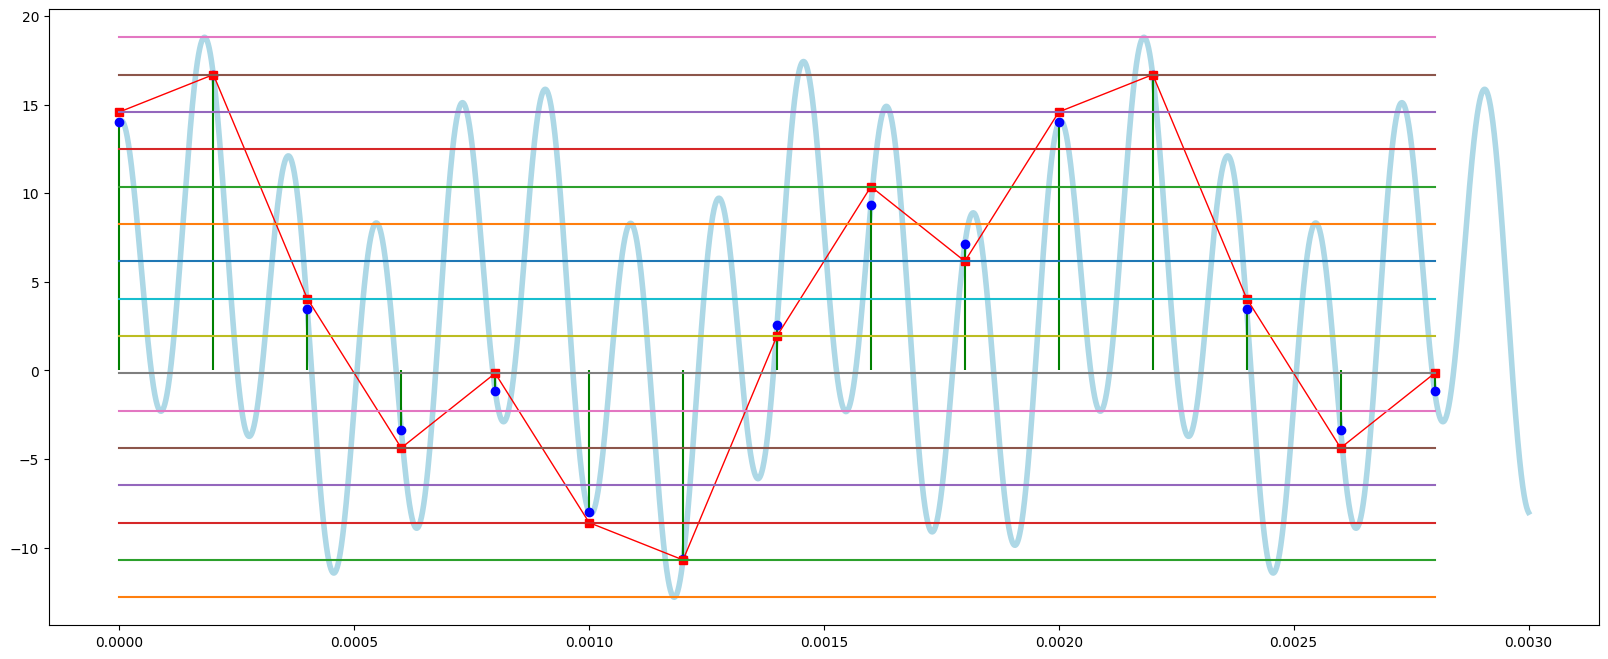

In [30]:
Fs = 5000   # frecuencia de muestreo en Hz
Fo = 1000   #Frecuencia de la señal pequeña
To = 1/Fo   # Periodo de la Señal
Ts = 1/ Fs       # Timpo de mustreo

bit = 4       # No. de bit para la cuantizacion
Cajones = 2**bit  # los niveles para la cuantización de 4 bit

Periodos = 3  # 3 periodos para la simulacion
T_simular = Periodos * To
t = np.linspace (0, T_simular, 10000) # valores de muestreo para tiempo continuo
tn = np.arange( 0, T_simular , Ts)  # Valores de nuestreo para tiempo de discretizacion

# definimos la función
xt = 3 + np.cos(1000* np.pi * t) + 5 * np.sin(3000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# discritización
xn = 3 + np.cos(1000* np.pi * tn) + 5 * np.sin(3000 * np.pi * tn) + 10 * np.cos(11000 * np.pi * tn)

#cuantizacion
Niveles = np.linspace(min(xt), max(xt), Cajones) # elejimos los puntos max y minimos de la señal original
D_cercana_canojes = np.abs(xn[:, None]- Niveles[None ,:]) # generamos matriz de cuantizacion con los valores mas cercanos a los cajones
Indice = np.argmin(D_cercana_canojes, axis =1) # el argumento de los niveles de cuantizacion mas cercanos

Xk = Niveles[Indice]


plt.figure(figsize=(20, 8))
plt.plot(t, xt, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(tn, xn, label='$x(t)$', linefmt='green', markerfmt='blue', basefmt=" ")
plt.plot(tn, Xk, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

#Estados de cuantificacion
for v in Niveles:
  plt.plot(tn,v*np.ones(len(tn)))


Con el teorema de Nyquist donde Fs >= 2Fmax con respecto a la Fs dada

5000 >= 2*5500 5000 >= 11000

esto nos dice que para tener la discretización no es la adecuada, para que sea adecuada Fs tiene que ser >= a 11000 Hz

A continuación, se toma el mismo Código modificando Fs de 5000Hz a 20000Hz para visualizar la diferencia de la tabla de muestre



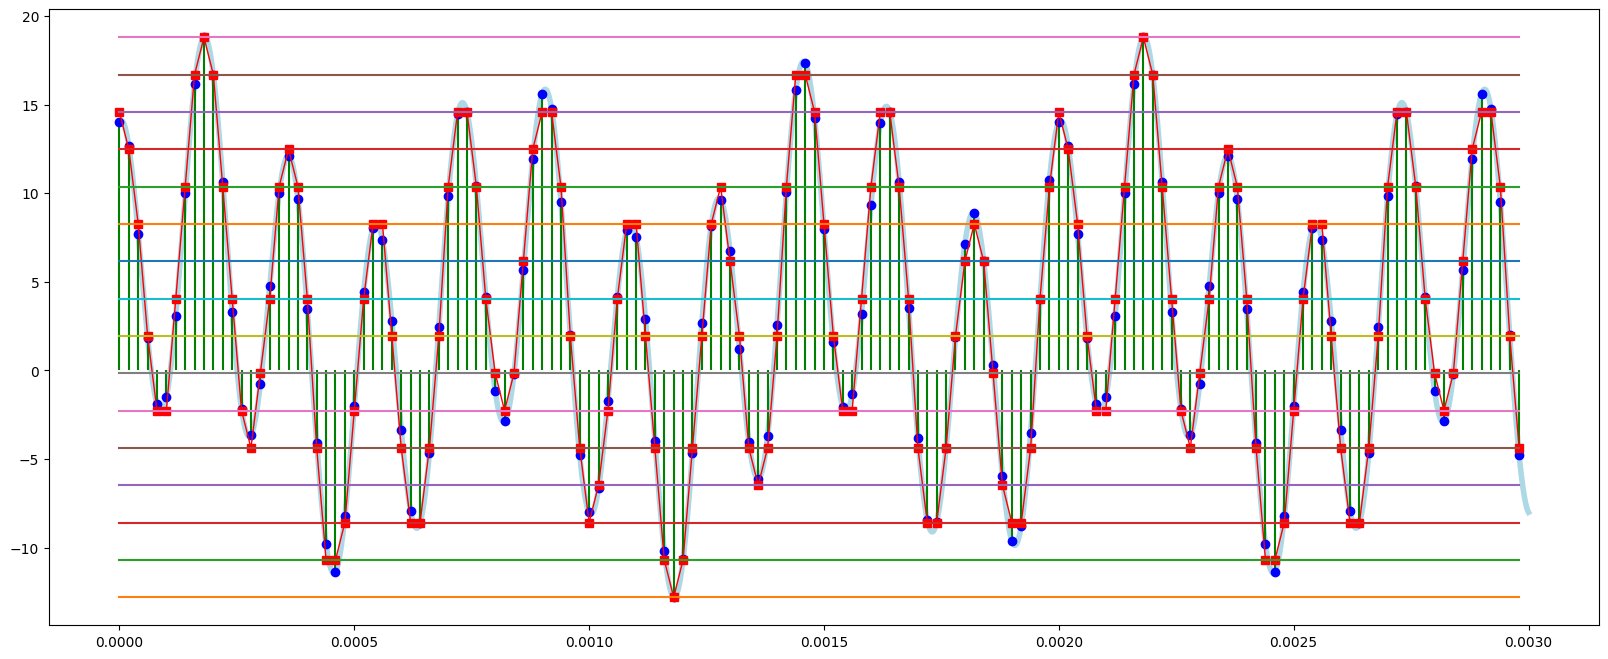

In [31]:
Fs = 50000   # frecuencia de muestreo en Hz
Fo = 1000   #Frecuencia de la señal pequeña
To = 1/Fo   # Periodo de la Señal
Ts = 1/ Fs       # Timpo de mustreo

bit = 4       # No. de bit para la cuantizacion
Cajones = 2**bit  # los niveles para la cuantización de 4 bit

Periodos = 3  # 3 periodos para la simulacion
T_simular = Periodos * To
t = np.linspace (0, T_simular, 10000) # valores de muestreo para tiempo continuo
tn = np.arange( 0, T_simular , Ts)  # Valores de nuestreo para tiempo de discretizacion

# definimos la función
xt = 3 + np.cos(1000* np.pi * t) + 5 * np.sin(3000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)

# discritización
xn = 3 + np.cos(1000* np.pi * tn) + 5 * np.sin(3000 * np.pi * tn) + 10 * np.cos(11000 * np.pi * tn)

#cuantizacion
Niveles = np.linspace(min(xt), max(xt), Cajones) # elejimos los puntos max y minimos de la señal original
D_cercana_canojes = np.abs(xn[:, None]- Niveles[None ,:]) # generamos matriz de cuantizacion con los valores mas cercanos a los cajones
Indice = np.argmin(D_cercana_canojes, axis =1) # el argumento de los niveles de cuantizacion mas cercanos

Xk = Niveles[Indice]


plt.figure(figsize=(20, 8))
plt.plot(t, xt, label='$x(t)$', color='lightblue', linewidth=4)
plt.stem(tn, xn, label='$x(t)$', linefmt='green', markerfmt='blue', basefmt=" ")
plt.plot(tn, Xk, label='$x[n]$', color='red', marker='s', linestyle='-', linewidth=1)

#Estados de cuantificacion
for v in Niveles:
  plt.plot(tn,v*np.ones(len(tn)))

## **3.**
Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t \in [t_i, t_f]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:

$$c_n = \frac{1}{(t_f - t_i) (jn\omega_0)^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} dt; \quad \forall n \in \mathbb{Z}.$$

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?


## **4.**
Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente las simulaciones de Python respectivas.

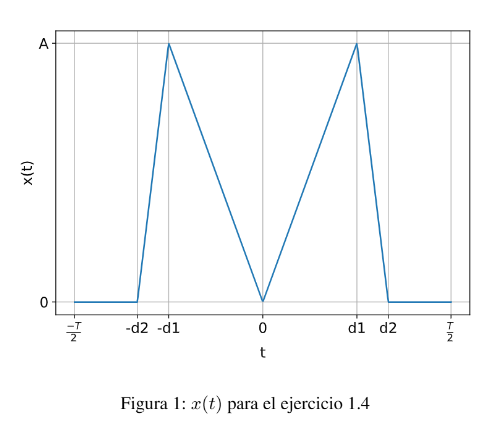

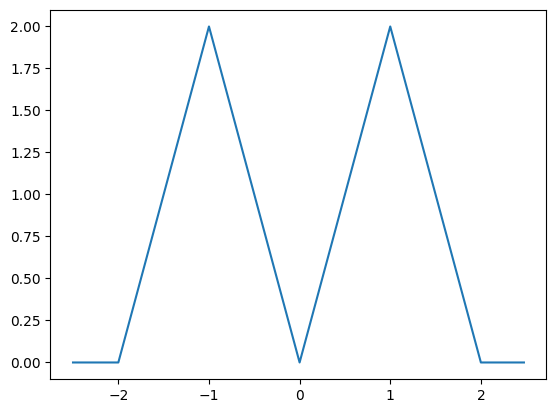

In [32]:
# Parámetros de la grafica

T = 5 # segundos de gráfica
A = 2 # altura de la señal
d1 = 1 # d1 < T/2
d2 = 2 # d2 < T/2
Fs = 200*1/T # frecuencia de muestreo definida
Ts = 1/Fs # periodo de muestreo
t = np.arange(-T/2,T/2,Ts)
x = np.zeros(len(t))
x.shape
x [(t>=-d2)&(t<-d1)] = (A/(d2-d1))*t[(t>=-d2)&(t<-d1)] + A*d2/(d2-d1)
x[(t>=-d1)&(t<0)] = -(A/d1)*t[(t>=-d1)&(t<0)]
x[(t>=0)&(t<d1)] = (A/d1)*t[(t>=0) & (t<d1)]
x[(t>=d1)&(t<d2)] = -(A/(d2-d1))*t[(t>=d1)&(t<d2)] + A*d2/(d2-d1)
plt.plot(t,x)

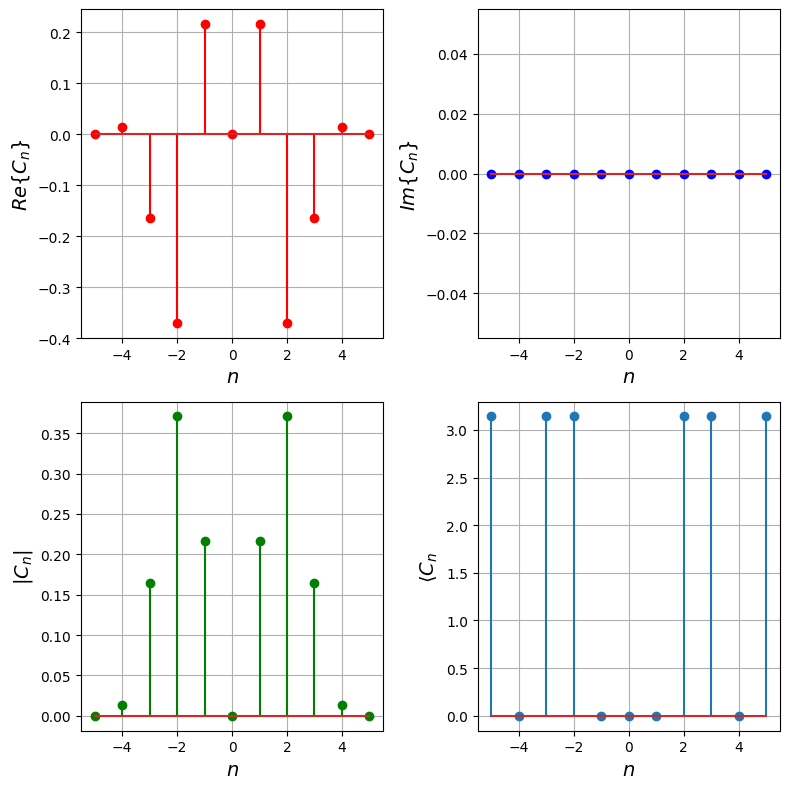

In [33]:
N = 5 #numero armonicos
wo = 2*np.pi/T # frecuencia fundamental

# definir bases
Nm = len(t)
phin = np.zeros((Nm,2*N+1),dtype=np.complex128)   #crear matriz para guardar bases
m1 = A/(d2-d1)
m2 = A/d1
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*t)               #base de fourier en el intervalo de interés

'''calcular espectro'''
cn = np.zeros(2*N+1,dtype=np.complex128)
nv = np.linspace(-N, N, 2*N+1) #vector num armónicos
Cn = np.zeros(2*N+1,dtype=np.complex128)          # ← Cn ahora sí será vector

# Calcular cada coeficiente Cn
for i, n in enumerate(nv):
    if n == 0:
        Cn[i] = 0
    else:
        Cn[i] = (-1 / (T * n**2 * wo**2)) * (
            (2 * m1 * np.cos(d2 * n * wo))
            - (2 * (m1 + m2) * np.cos(d1 * n * wo))
            + (2 * m2)
        )
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'b')
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'g') # magnitud del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'h') # fase del espectro
plt.xlabel(r'$n$',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [36]:
xe = phin.dot(Cn) # dot calcula el producto entre vectores


Px = (2/T) * (A**2 +d2) / (3 * T)  # estimar según señal estudiada
def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)
    P_aprox = np.sum(np.abs(Cn[ind])**2)
    er = 1 - P_aprox / Px
    #señal reconstruida
    xe = phin[:, ind].dot(Cn[ind])
    plt.plot(t, np.real(xe), color='b', label=rf'$\hat{{x}}(t)$ (reconstruida)')
    plt.plot(t, x, color='r', label='$x(t)$ (Original)')
    title_str = rf'$N_a = {Na}$ armónicos --> $E_r = {100*er:.2f}\%$'
    plt.title(title_str, fontsize=14)

    plt.xlabel('t [s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest, Na =(0, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest(Na=1)>